In [27]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Random Continuous Distribution

In [28]:
import random

In [29]:
# A function that will create randomly distributed data
def create_random_dataset(n: int) -> np.array:
    return np.array([random.randint(1, 100) for i in range(0, n)])

<Axes: ylabel='Count'>

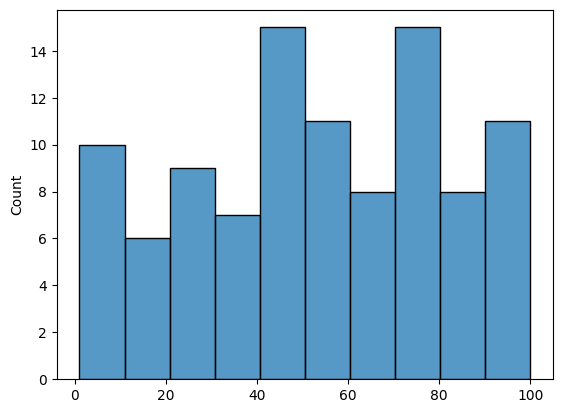

In [33]:
# When n == options_n
dataset_100 = create_random_dataset(100)

sns.histplot(dataset_100, bins = 10)

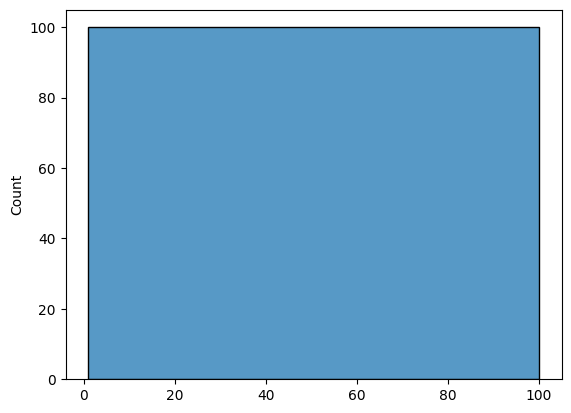

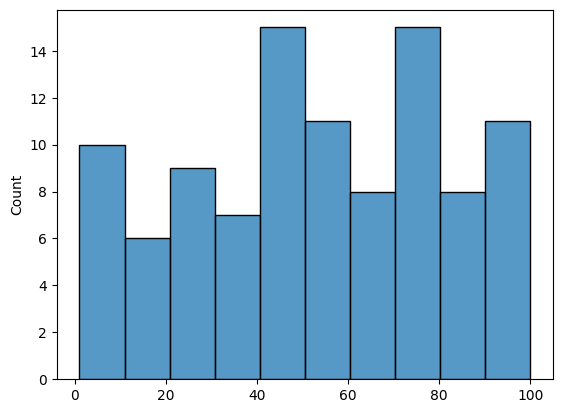

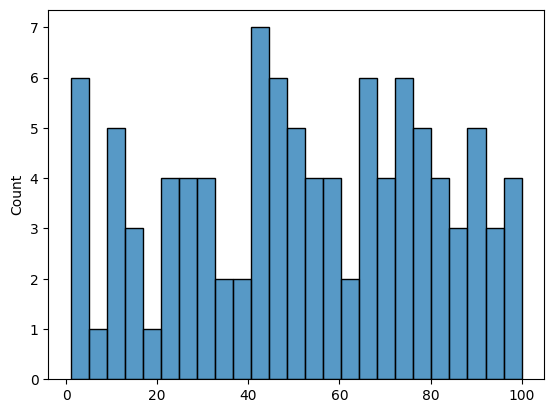

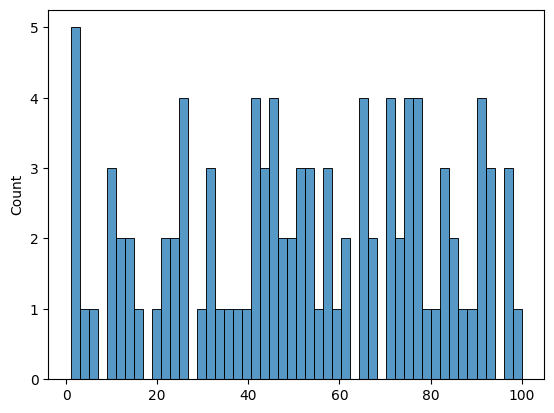

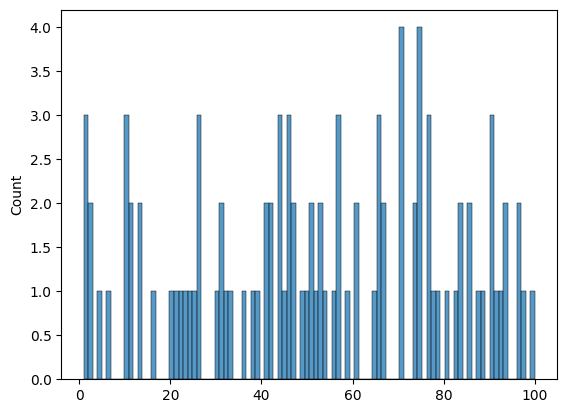

In [34]:
# when you change the bin number (bins go down), the graph looks more uniform
for bin in [1, 10, 25, 50, 100]:
    plt.figure()
    sns.histplot(dataset_100, bins = bin)
    plt.show()

<Axes: ylabel='Count'>

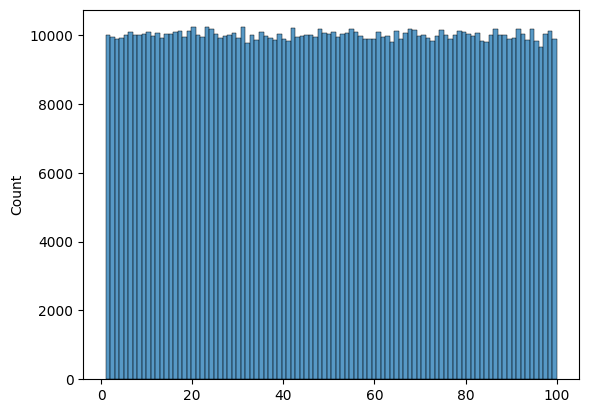

In [35]:
# as the n of dataset increases, the more uniform the data will look even when bins is high
dataset_million = create_random_dataset(1000000)
sns.histplot(dataset_million, bins = 100)

# calculate the average from a probability distribution of discrete variable

1. dice : p(1) = 1/6  ... p(6) 

the average roll = p(1) * (1_value) ++ p(6) * (6_value)
= 1/6 * 1 + 1/6 * 2 = ... 1/6 * 6
= 1/6 * (1 + 2 + ... 6)

# getting the average from some discrete distribution == getting a weight average

dice = p(1) = 0.2; p(2) = 0 .. 

mean = 0.2 * 1 + 0 * 2 ... 

# Discrete Probability Distributions: Bernoulli
 ** P is the probability of success (always)
 
### Splitting out the equations

p_defect = 0.15 (success) (X= 1) p^x

When X = 1 (success): 
P(X = 1) = p^x * (1 - p)^(1-x) => p^x # p(2 machine parts are defective)

When X = 0 (no success): # machine part is not defective
P(X) = p^x * (1 - p)^(1 - x) X = 0 (no success)
P(1) = p ^0 * (1 - p_defect) ^ (1 - 0) 

In [37]:
import scipy
scipy.stats.__dict__.keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', '_warnings_errors', 'ConstantInputWarning', 'NearConstantInputWarning', 'DegenerateDataWarning', 'FitError', '_distr_params', '_constants', '_distn_infrastructure', '_stats', '_tukeylambda_stats', '_ksstats', '_boost', '_continuous_distns', '_biasedurn', '_discrete_distns', '_levy_stable', '_entropy', 'distributions', '_stats_pythran', '_stats_mstats_common', '_mstats_basic', '_common', '_hypotests', '_axis_nan_policy', '_resampling', '_binomtest', '_stats_py', 'find_repeats', 'gmean', 'hmean', 'pmean', 'mode', 'tmean', 'tvar', 'tmin', 'tmax', 'tstd', 'tsem', 'moment', 'skew', 'kurtosis', 'describe', 'skewtest', 'kurtosistest', 'normaltest', 'jarque_bera', 'scoreatpercentile', 'percentileofscore', 'cumfreq', 'relfreq', 'obrientransform', 'sem', 'zmap', 'zscore', 'gzscore', 'iqr', 'gstd', 'median_abs_deviation', 'sigmaclip', 'trimboth', 'trim1', 'trim_mean', '

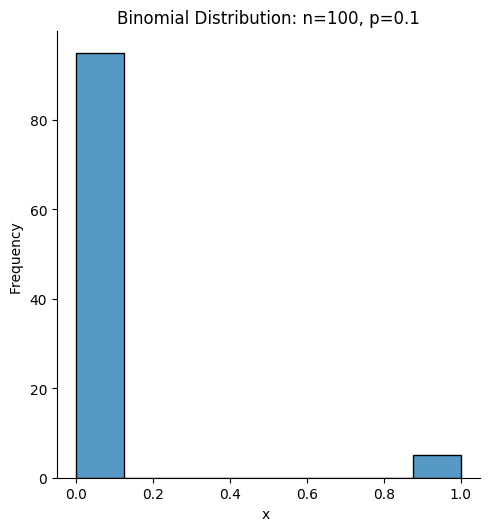

In [39]:
# bernoulli
from scipy.stats import bernoulli

sample_size = 100
probability_success = 0.1 #can play with the proabilty of success

dataset_bernoulli = bernoulli.rvs(size = sample_size, p = probability_success)
#print(np.unique(dataset_bernoulli, return_counts = True))

graph = sns.displot(dataset_bernoulli, kde = False)
graph.set(xlabel="x ", ylabel="Frequency ", title = f"Binomial Distribution: n={sample_size}, p={probability_success}")

# Binomial Distribution
 ** Built off of Bernoulli distribution
 
 1. Adds a fixed number of trials (n) in 1 sample
     - Every time you do an experiment (which you do N_data times to make your dataset), you have n_trials each experiment
     - Trial: 5 coin flips; 1000 experiments of flipping the coin 5 times 
         - total number of coin flips: 1000 * 5
 2. Binomial distribution: 
     - if the probiability of of getting a HEADS is constant regardless of how many coin flips I make (Independent Event), then:
     - Binomial Distribution: 
         - What is the likelihood that in 5 flips I flip 4 Heads?  or 1 Head? .. etc
         - In the population of flipping a fair coin 5 times.  

# Going through the powerpoint example: What is the chance of randomly getting 2 defective parts when I check 8 parts?

p_defect = 0.15 

formula = P(X=defect) = C(n, k) * p^k * (1 - p)^ (n-k)
1. Success Definition: Machine is Defective

2. probability(defect) = 0.15

3. n = number of parts I randomly check each time I do a quality check (8)
4. k = 2 parts are defective

## Fill out denominator (total number of combos/ sequences where 2 defective parts are found in 8 parts)

C(n, k) = n! / (k! * (n - k)!) 
C(8, 2) = 4 * 7 / (2) => 28




The first 5 values from this distribution:
[7 8 7 7 7]


/var/folders/y0/_r4pmpsx6qjbvc93xxxb0lbm0000gn/T/ipykernel_29170/1427763559.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_binom,


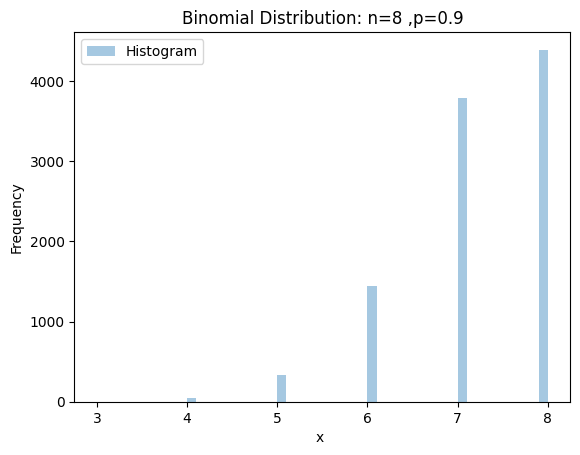

In [42]:
from scipy.stats import binom

# Generate Binomial Data
sample_size = 10000
param_n = 8 # number of trials per sample
param_p = 0.9 # probability of success in one trial
data_binom = binom.rvs(size=sample_size, n=param_n,p=param_p,)

# print a few values from the distribution:
print('The first 5 values from this distribution:')
print(data_binom[0:5])

# Create the Plot
ax = sns.distplot(data_binom,
                  kde=False,
                  hist_kws={"label": "Histogram"})
ax.set(xlabel='x ', ylabel='Frequency', title=f'Binomial Distribution: n={param_n} ,p={param_p}')
ax.legend();


# Poisson Distribution

1. Click through rate:
- on average, (seen in my data), I know that in (1 day), people will on average click (lambda: 3)


In [49]:
# this cell makes a function that graphs a poisson distribution when given a lambda
from scipy.stats import poisson

# Generate Poisson Data
def graph_poisson(param_mu):
    sample_size = 10000
    data_poisson = poisson.rvs(size=sample_size, mu=param_mu)
    
    # print a few values from the distribution:
    print('The first 5 values from this distribution:')
    print(data_poisson[0:5])

    # Create the Plot
    ax = sns.histplot(data_poisson,
                      discrete = True,
                      stat = "probability")
    ax.set(xlabel='x ', ylabel='probability', title=f'Poisson Distribution: Sample Size = {sample_size}, mu={param_mu}');
    ax.legend();

In [53]:
data_poisson = poisson.rvs(size=10000, mu=3)
poisson.__dict__.keys()

dict_keys(['_stats_has_moments', '_random_state', '_ctor_param', 'badvalue', 'a', 'b', 'moment_tol', 'inc', 'shapes', '_parse_arg_template', 'numargs', '_cdfvec', 'vecentropy', '_parse_args', '_parse_args_stats', '_parse_args_rvs', 'generic_moment', '_ppfvec', 'name', 'extradoc', '__doc__'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The first 5 values from this distribution:
[2 4 2 1 0]


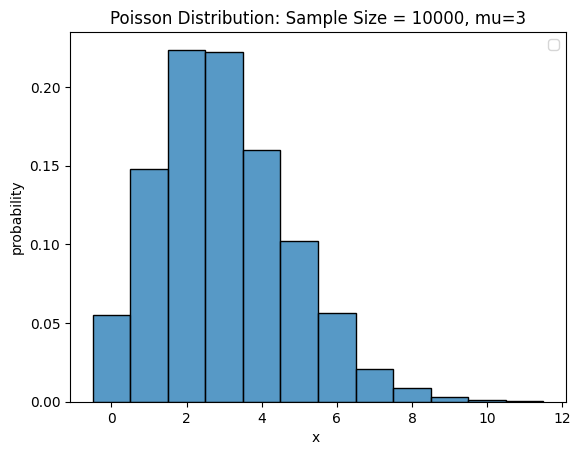

In [44]:
# Let's look at various poisson distributions
## Average click through rate in a day is 3
## What is the probability that a client clicks 10 times?
graph_poisson(3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The first 5 values from this distribution:
[11 11  8 15 11]


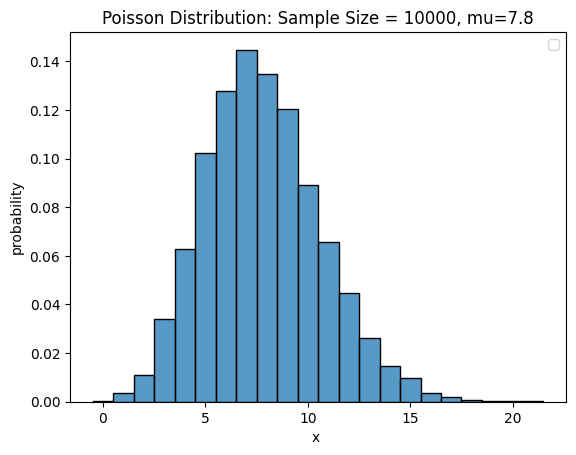

In [46]:
# Poi
graph_poisson(7.8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The first 5 values from this distribution:
[ 90  95 101  98 128]


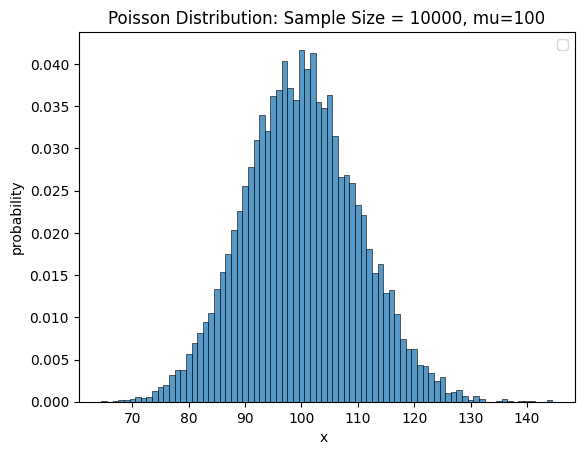

In [47]:
# Poi
## What is the probability that a client clicks > 100 times?
graph_poisson(100)

# Normal Distribution

Hey we've covered this already!

The first 5 values from this distribution:
[ -99.75906852 -112.79771497  -84.96452246  -95.04605255 -102.9218335 ]


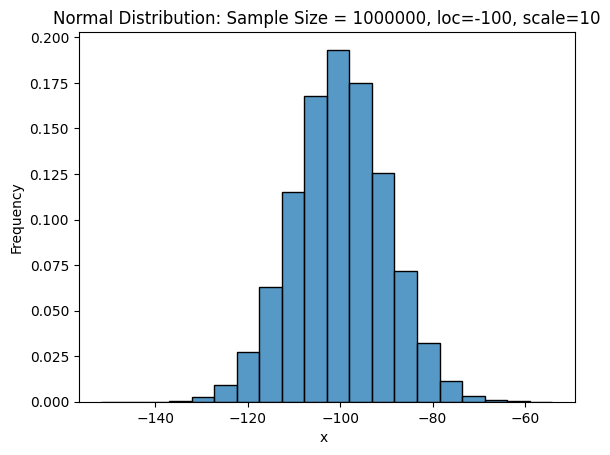

In [56]:
from scipy.stats import norm
# generate random numbers from a normal distribution

sample_size = 1000000
param_loc = -100 # mean
param_scale = 10 # standard deviation
data_normal = norm.rvs(size=sample_size,loc=param_loc,scale=param_scale)

# print a few values from the distribution:
print('The first 5 values from this distribution:')
print(data_normal[0:5])

# plot a histogram of the output
ax = sns.histplot(data_normal,
                  bins=20,
                  stat = "probability")
ax.set(xlabel='x ', ylabel='Frequency', title=f'Normal Distribution: Sample Size = {sample_size}, loc={param_loc}, scale={param_scale}');
